<a href="https://colab.research.google.com/github/BrianWengier/CAP4630/blob/master/hw2/AIHW2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import models
from keras import layers

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

In [0]:
def digitWidth(vecx):
  leftMost = 27
  rightMost = 0
  for y in range(28):
    for x in range(28):
      if vecx[y*28 + x] > 0:
        if x < leftMost:
          leftMost = x
        if x > rightMost:
          rightMost = x
  return (rightMost - leftMost + 1) / 28

In [0]:
def digitHeight(vecx):
  lowerMost = 28
  upperMost = 0
  for y in range(28):
    for x in range(28):
      if vecx[y*28 + x] > 0:
        if y < lowerMost:
          lowerMost = y
        if y > upperMost:
          upperMost = y
  return (upperMost - lowerMost + 1) / 28

In [0]:
def averageIntensity(vecx):
  pixelSum = 0
  totalPixels = len(vecx)
  for i in range(totalPixels):
    pixelSum += vecx[i]
  return pixelSum / totalPixels

In [0]:
traversed = []

def whiteRegionHelper(vecx, i, j):
  r = -1
  dr = -1
  d = -1
  dl = -1
  l = -1
  ul = -1
  u = -1
  ur = -1
  
  if i < 28:
    r = vecx[(i+1) + j*28]


def digitWhiteRegions(vecx):
  whiteRegions = 0
  for y in range(28):
    for x in range(28):
      index = x + 28*y
      if vecx[index] != 0 && index not in traversed:
        whiteRegions += whiteRegionHelper(vecx, x, y)
  return whiteRegions

29.60969387755102

In [0]:
imgs = train_images_original
widths = []
heights = []
intens = []

for i in range(len(imgs)):
  current = imgs[i].flatten()
  widths.append(digitWidth(current))
  heights.append(digitHeight(current))
  intens.append(averageIntensity(current))

In [0]:
timgs = test_images_original
widthsTest = []
heightsTest = []
intensTest = []

for i in range(len(timgs)):
  current = imgs[i].flatten()
  widthsTest.append(digitWidth(current))
  heightsTest.append(digitHeight(current))
  intensTest.append(averageIntensity(current))

In [46]:
len(widthsTest)

10000

In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

In [0]:
train_images = np.column_stack((train_images, widths))
train_images = np.column_stack((train_images, heights))
train_images = np.column_stack((train_images, intens))

test_images = np.column_stack((test_images, widthsTest))
test_images = np.column_stack((test_images, heightsTest))
test_images = np.column_stack((test_images, intensTest))

In [0]:
network = models.Sequential()
network.add(layers.Dense(256, activation='relu', input_shape=(28*28 + 3,)))
network.add(layers.Dense(10, activation='softmax'))

In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [96]:
epochs = 10
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.3744 - acc: 0.8946 - val_loss: 0.3056 - val_acc: 0.9073
Epoch 2/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.1814 - acc: 0.9466 - val_loss: 0.2413 - val_acc: 0.9289
Epoch 3/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.1266 - acc: 0.9634 - val_loss: 0.2363 - val_acc: 0.9295
Epoch 4/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0964 - acc: 0.9711 - val_loss: 0.1867 - val_acc: 0.9452
Epoch 5/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.0772 - acc: 0.9768 - val_loss: 0.2452 - val_acc: 0.9321
Epoch 6/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0641 - acc: 0.9812 - val_loss: 0.2513 - val_acc: 0.9306
Epoch 7/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.0551 - acc: 0.9837 - val_loss: 0.2167 - val_acc

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

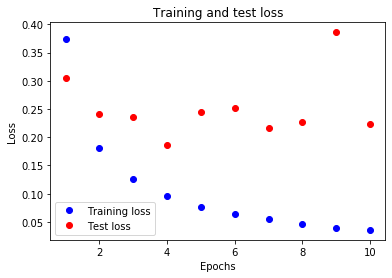

In [98]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

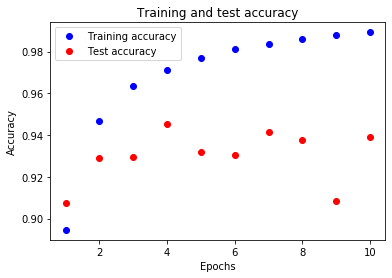

In [100]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()